In [1]:
# import basics
import pandas as pd
import numpy as np
import datetime as dt
import math as mth
import time
import requests
import json
from IPython.display import Latex
from scipy import stats as st

# inport plot libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
from plotly import graph_objects as go
from plotly.subplots import make_subplots

# make better view for tables
from IPython.display import display
from IPython.core.display import HTML
from IPython.display import Image

# wide display
#pd.set_option('max_colwidth', 1000)

# change the window size
display(HTML("<style>div.output_scroll { height: 50em; }</style>"))

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# set settings for display option
pd.set_option('display.max_columns', 500)

# import ML
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

### Оглавление: 

<a href='#Описание проекта'>1. Описание проекта</a>

<a href='#Описание данных'>2. Описание данных</a>

<a href='#Цели и задачи проекта'>3. Цели и задачи проекта</a>

<a href='#Чтение данных'>4. Чтение и обработка данных</a>

- <a href='#Выводы: Чтение данных'>Выводы: Чтение и обработка данных</a>

<a href='#Анализ данных'>5. Анализ данных</a>

- <a href='#Выводы: Анализ данных'>Выводы: анализ данных</a>

<a href='#Модель прогнозирования оттока клиентов'>6. Модель прогнозирования оттока клиентов</a>

- <a href='#Выводы: Модель прогнозирования оттока клиентов'>Выводы: модель прогнозирования оттока клиентов</a>

<a href='#Кластеризацию клиентов'>7. Кластеризацию клиентов</a>

- <a href='#Выводы: Кластеризацию клиентов'>Выводы: кластеризацию клиентов</a>

<a href='#Выводы по проекту'>8. Выводы по проекту</a>

# 1. Описание проекта / Project Description
<a id='Начало'></a>
<a id='Описание проекта'></a>

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.

Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.

Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.

Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.

Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.

# 2. Описание данных / Data description
<a id='Описание данных'></a>

 - `Churn` — факт оттока в текущем месяце;

Текущие поля в датасете/ Данные клиента за предыдущий до проверки факта оттока месяц:
 - `gender` — пол;
 - `Near_Location` — проживание или работа в районе, где находится фитнес-центр;
 - `Partner` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
 - `Promo_friends` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
 - `Phone` — наличие контактного телефона;
 - `Age` — возраст;
 - `Lifetime` — время с момента первого обращения в фитнес-центр (в месяцах).

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
 - `Contract_period` — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
 - `Month_to_end_contract` — срок до окончания текущего действующего абонемента (в месяцах);
 - `Group_visits` — факт посещения групповых занятий;
 - `Avg_class_frequency_total` — средняя частота посещений в неделю за все время с начала действия абонемента;
 - `Avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц;
 - `Avg_additional_charges_total` — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

# 3. Цели и задачи проекта / Objectives of the project
<a id='Цели и задачи проекта'></a>

 **Цели**
 - научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
 - сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
 - проанализировать основные признаки, наиболее сильно влияющие на отток;
 - сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:

    1. выделить целевые группы клиентов;
    2. предложить меры по снижению оттока;
    3. определить другие особенности взаимодействия с клиентами.


**Задачи**

1. Проведите исследовательский анализ данных (EDA)
2. Постройте модель прогнозирования оттока клиентов
3. Сделайте кластеризацию клиентов
4. Сформулируйте выводы и сделайте базовые рекомендации по работе с клиентами

# 4. Чтение и обработка данных / Data reading
<a id='Чтение данных'></a>

In [2]:
%%time
#read csv files

try:
    logs = pd.read_csv('gym_churn.csv', sep=',') # локальный адрес
except:
    logs = pd.read_csv('/datasets/gym_churn.csv', sep=',') # адрес на Яндекс.Практикум

Wall time: 62 ms


In [3]:
%%time
display(logs.sample(5))
print(logs.info())

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
788,0,1,1,1,0,6,0,34,16.978823,5.0,8,1.356850,1.311278,0
3011,0,0,1,0,1,1,0,29,46.929359,1.0,3,1.777541,1.773045,0
954,0,1,1,1,1,12,1,34,96.087609,11.0,4,2.370811,2.302503,0
1402,0,1,0,0,1,1,0,25,96.994850,1.0,1,1.525533,2.126957,1
3082,1,1,0,0,1,1,0,28,297.399090,1.0,3,2.294380,2.302114,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB
None
Wall time: 50 ms


**Rename columns**

In [4]:
# headings lowcase 
logs = logs.rename(columns=str.lower)

In [5]:
logs.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


**check duplicates**

In [6]:
%%time
print('Дубликаты в DataFrame logs -', logs.duplicated().sum())

Дубликаты в DataFrame logs - 0
Wall time: 16 ms


**type correction**

In [7]:
%%time
# there is no items for type correction

Wall time: 0 ns


# Выводы: чтение и обработка данных / Conclusion: Reading data
<a id='Выводы: Чтение данных'></a>

DF `logs` не имеет дубликатов, все значения уникальны, пропуски в данных отсетствуют.

Столбцы привидены к нижнему регистру.

Тип данных у столбцов корректный.
   
 <a href='#Начало'>В начало</a>

# 5. Анализ данных / Data Analysis
<a id='Анализ данных'></a>

 - **Посмотрите на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения (пригодится метод describe())**

In [8]:
%%time
logs.describe()

Wall time: 81.9 ms


,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


 - **Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby())**

In [9]:
%%time
display(logs.groupby('churn').mean())

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Wall time: 50 ms


In [10]:
%%time
display(logs.groupby('churn').count())

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,2939,2939,2939,2939,2939,2939,2939,2939,2939,2939,2939,2939,2939
1,1061,1061,1061,1061,1061,1061,1061,1061,1061,1061,1061,1061,1061


Wall time: 27 ms


 - **Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)**

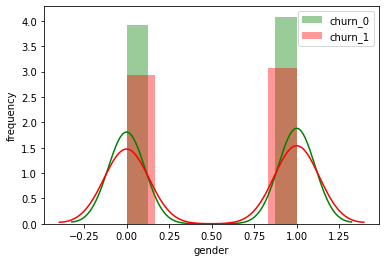

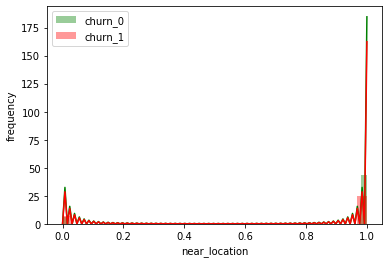

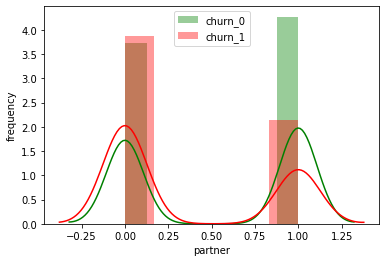

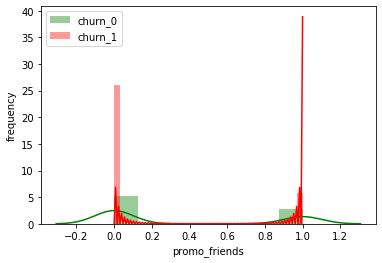

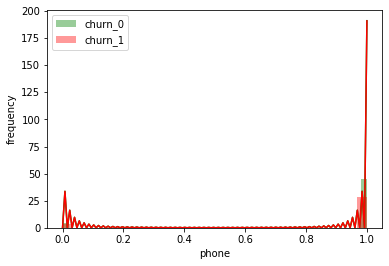

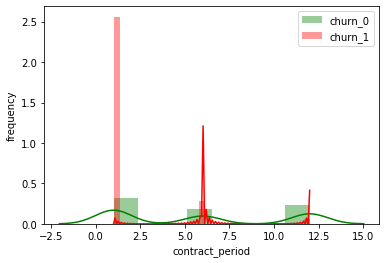

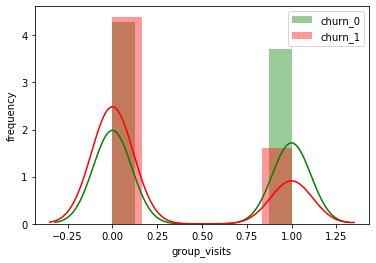

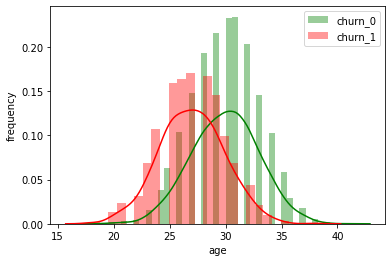

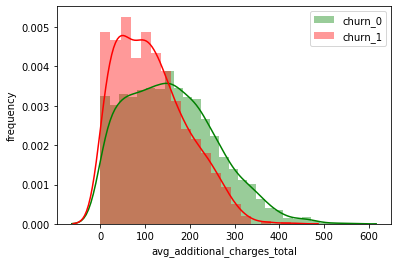

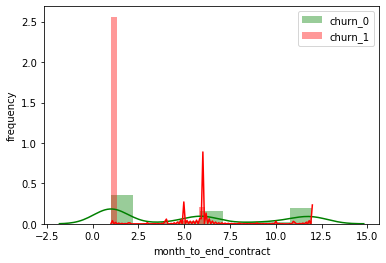

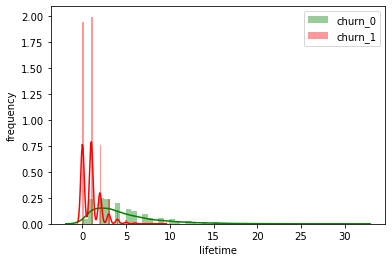

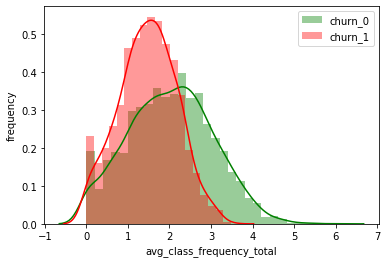

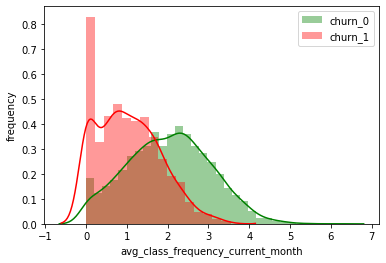

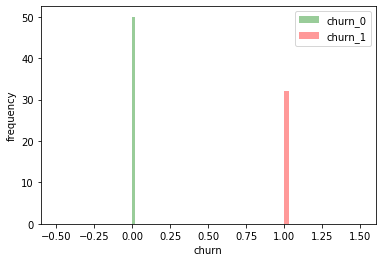

Wall time: 7.58 s


In [11]:
%%time
churn_0 = logs.query('churn == 0')
churn_1 = logs.query('churn == 1')

for i in logs.columns:
    sns.distplot( churn_0[i] , color="green", label="churn_0")
    sns.distplot( churn_1[i] , color="red", label="churn_1")
    plt.ylabel('frequency')
    plt.legend()
    plt.show()


 - **Постройте матрицу корреляций и отобразите её**

In [12]:
# correlation matrix
cm = logs.corr()
cm

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
near_location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


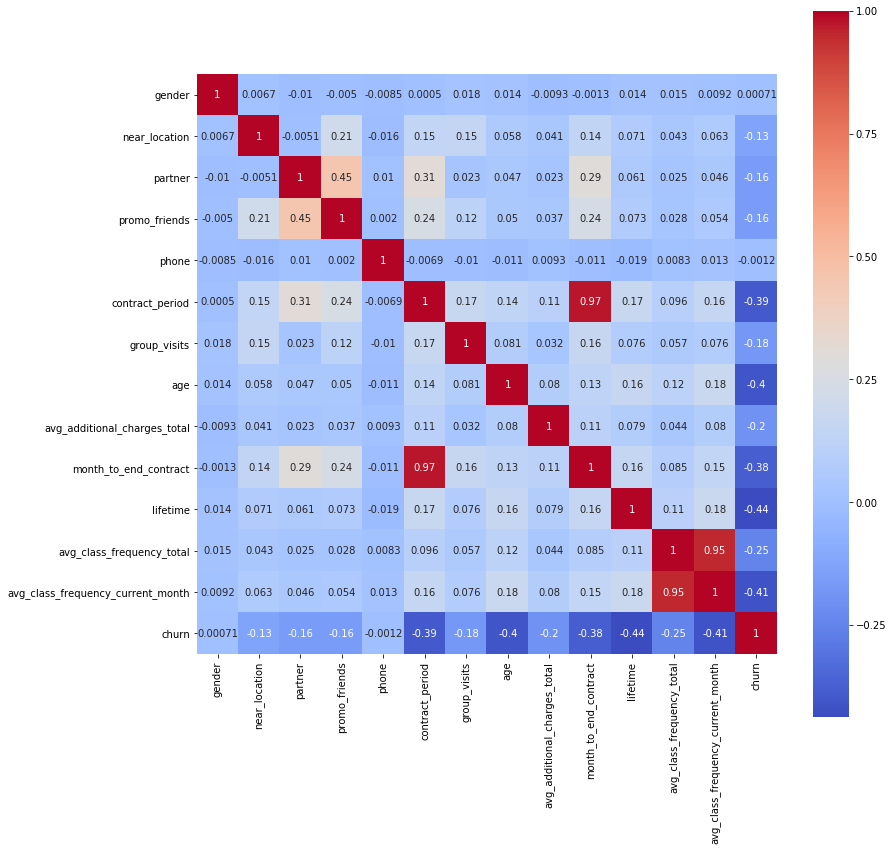

Wall time: 1.56 s


In [13]:
%%time
#построим и отрисуем матрицу корреляций
fig, ax = plt.subplots(figsize=(13, 13))

#нарисуем тепловую карту с подписями для матрицы корреляций
sns.heatmap(cm, annot = True, square=True, cmap='coolwarm') 
plt.show()

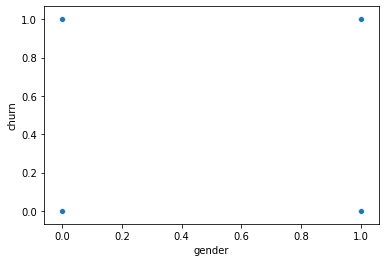

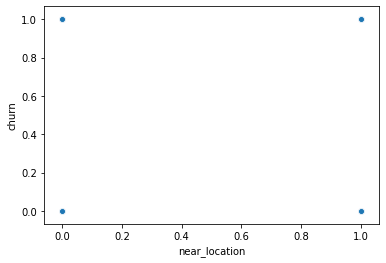

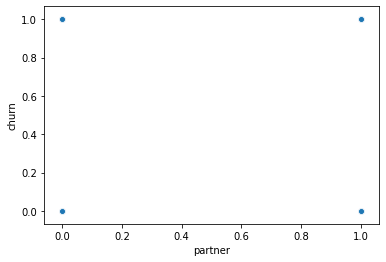

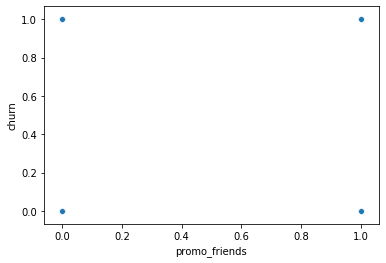

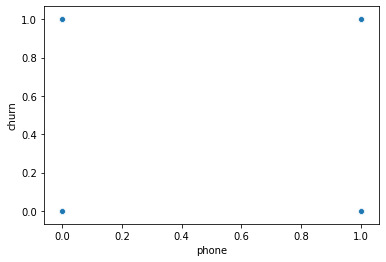

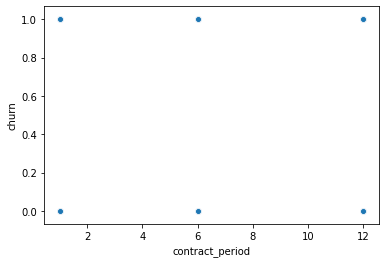

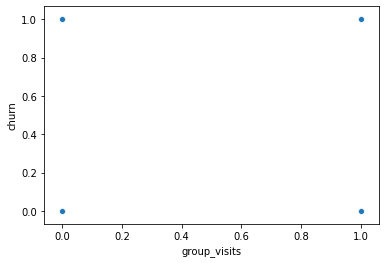

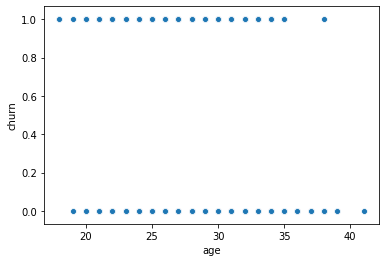

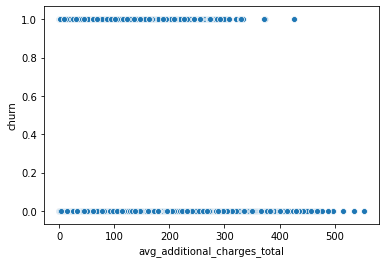

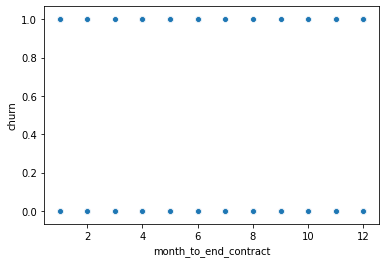

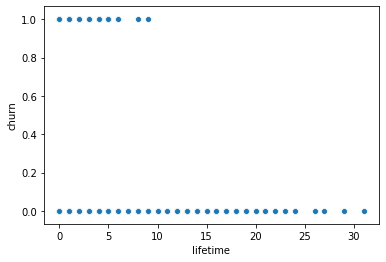

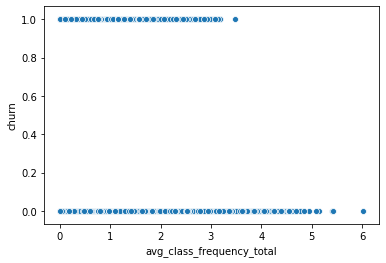

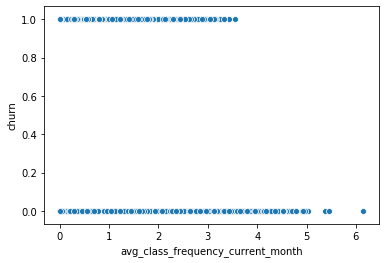

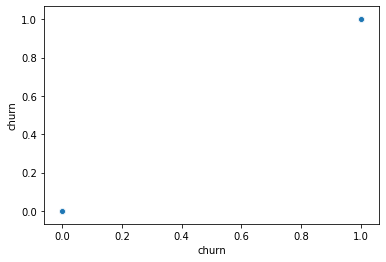

Wall time: 4.69 s


In [14]:
%%time
#построим попарные диаграммы рассеяния признак-целевая переменная churn для каждого признака
for col in logs.columns:
    sns.scatterplot(logs[col], logs['churn']) 
    plt.show()

# Выводы: анализ данных / Conclusion: Data Analysis
<a id='Выводы: Анализ данных'></a>

Аномалий в данных не обнаружено.
Уходит много, около 25% пользователей. Кто уходит:

 - Примерно одинаково 1 и 0, с тз половой принадлежности
 - Чаще всего те, кто дальше располагается от фитнес клуба
 - **Чаще всего те, те у кого нет партнёра (в качестве работодателя)**
 - **Чаще всего те, у кого нет друзей в фитнес клубе**
 - **Чаще всего те, у кого контракт меньше года (в среднем на 1-3 месяца)**
 - Чаще всего те, кто мало посещает групповые занятия 
 - **Чаще всего молодая возвратная группа до 27 лет**
 - Эти пользователи меньше пользуются дополнительными платными услугами
 - Как правило у них до конца контракта остается 1,5 месяца. Т.е. они посещают клуб примерно 1 месяц, потом бросают
 - Ходят на тренировке 1 или 2 раза в неделю

Прослеживается сильная зависимость оттока от:
 - Длительности контракта и остаточный период контракта 
 - Средняя частота посещений за все время и за последнюю неделю.
 - Наличия друга или партнёра, скорей всего друзья с работы.


# 6. Модель прогнозирования оттока клиентов / customer churn forecasting model
<a id='Модель прогнозирования оттока клиентов'></a>

In [15]:
# удалим мультиколлинеарные признаки для более точных прогнозов
logs_drop = logs.drop(['month_to_end_contract', 'promo_friends', 'avg_class_frequency_current_month'], axis = 1)
logs_drop

,gender,near_location,partner,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total,churn
0,1,1,1,0,6,1,29,14.227470,3,0.020398,0
1,0,1,0,1,12,1,31,113.202938,7,1.922936,0
2,0,1,1,1,1,0,28,129.448479,2,1.859098,0
3,0,1,1,1,12,1,33,62.669863,2,3.205633,0
4,1,1,1,1,1,0,26,198.362265,3,1.113884,0
...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,1,12,0,33,2.406023,8,2.284497,0
3996,0,1,0,1,1,1,29,68.883764,1,1.277168,1
3997,1,1,1,1,12,0,28,78.250542,2,2.786146,0
3998,0,1,1,1,6,0,32,61.912657,3,1.630108,0


In [16]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = logs_drop.drop(columns = ['churn'])
y = logs_drop['churn']

In [17]:
# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [18]:
# обучите StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

# Стандартизация данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

**Логистическая регрессия**

In [19]:
# зададим алгоритм для модели логистической регрессии
lr_model = LogisticRegression()
# обучим модель
lr_model.fit(X_train_st, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]

In [21]:
display(lr_predictions)

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,

In [22]:
display(lr_probabilities)

array([3.98541727e-03, 9.57857770e-01, 5.12646187e-01, 7.97991459e-01,
       5.86122962e-02, 6.85120803e-03, 4.39852670e-02, 1.54518718e-03,
       8.42076703e-01, 1.25212642e-02, 3.46644754e-03, 3.11325272e-01,
       1.75125337e-01, 2.15758580e-01, 1.12438359e-02, 6.60384056e-01,
       9.92169102e-02, 2.32149899e-06, 8.51649404e-01, 1.43383608e-01,
       3.55153906e-01, 1.26164884e-03, 2.87495764e-03, 1.86930016e-02,
       5.54951478e-02, 6.57058355e-01, 7.69355236e-02, 9.03488349e-02,
       1.10076115e-01, 2.40481322e-03, 1.00537841e-06, 7.32498961e-02,
       5.39079684e-02, 3.99988556e-01, 1.90086859e-02, 2.07674895e-02,
       7.61583936e-04, 2.79701193e-03, 4.03115679e-04, 1.05185348e-01,
       2.33682170e-03, 9.40334812e-03, 1.29468724e-04, 5.69502915e-04,
       1.49183556e-02, 6.77788759e-01, 1.64497697e-01, 3.05288988e-03,
       9.16820368e-01, 8.94592113e-01, 6.39325620e-01, 1.58585411e-02,
       1.11894757e-02, 1.55300258e-02, 7.68598807e-08, 8.59083703e-01,
      

**Случайный лес**

In [23]:
# зададим алгоритм для модели случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
# обучим модель случайного леса
rf_model.fit(X_train_st, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [24]:
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test_st)# Ваш код здесь
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]# Ваш код здесь

In [25]:
display(rf_predictions)

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,

In [26]:
display(rf_probabilities)

array([0.05, 0.97, 0.24, 0.87, 0.18, 0.  , 0.09, 0.01, 0.88, 0.06, 0.  ,
       0.22, 0.02, 0.07, 0.06, 0.58, 0.11, 0.  , 0.9 , 0.13, 0.17, 0.  ,
       0.01, 0.12, 0.09, 0.43, 0.11, 0.04, 0.2 , 0.04, 0.03, 0.02, 0.19,
       0.56, 0.09, 0.04, 0.03, 0.01, 0.04, 0.2 , 0.01, 0.02, 0.  , 0.  ,
       0.05, 0.69, 0.07, 0.05, 0.96, 0.98, 0.48, 0.01, 0.05, 0.18, 0.1 ,
       0.66, 0.05, 0.35, 0.9 , 0.01, 0.94, 0.93, 0.03, 0.49, 0.  , 0.02,
       0.04, 0.01, 0.1 , 0.05, 0.02, 0.01, 0.05, 0.03, 0.01, 0.02, 0.89,
       0.38, 0.94, 0.02, 0.51, 0.03, 0.01, 0.1 , 0.03, 0.83, 0.95, 0.13,
       0.04, 0.03, 0.03, 0.  , 0.66, 0.05, 0.  , 0.03, 0.16, 0.03, 0.01,
       0.75, 0.18, 0.48, 0.99, 0.2 , 0.07, 0.  , 0.  , 0.39, 0.94, 0.02,
       0.03, 0.05, 0.94, 0.42, 0.54, 0.03, 0.04, 0.78, 0.  , 0.05, 0.  ,
       0.01, 0.  , 0.79, 0.93, 0.02, 0.06, 0.  , 0.94, 0.01, 0.72, 0.1 ,
       0.74, 0.01, 0.  , 0.31, 0.07, 0.37, 0.95, 0.51, 0.82, 0.97, 0.03,
       0.63, 0.  , 0.68, 0.69, 0.98, 0.22, 0.4 , 0.

In [27]:
# определим функцию, которая будет выводить наши метрики
def print_all_metrics(y_true, y_pred, y_proba, title = 'Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

In [28]:
# выведем все метрики логистической регрессии
print_all_metrics(y_test, lr_predictions, lr_probabilities , title='Метрики для модели логистической регрессии:')

Метрики для модели логистической регрессии:
	Accuracy: 0.90
	Precision: 0.78
	Recall: 0.81


In [29]:
# выведем все метрики случайного леса
print_all_metrics(y_test, rf_predictions, rf_probabilities, title = 'Метрики для модели случайного леса:')

Метрики для модели случайного леса:
	Accuracy: 0.90
	Precision: 0.80
	Recall: 0.80


# Выводы: модель прогнозирования оттока клиентов / Conclusion: customer churn forecasting model
<a id='Выводы: Модель прогнозирования оттока клиентов'></a>

`Accuracy` (доля правильных ответов) одинакова для модели Логистической регресии и модели Случайного леса.
Наблюдается разница в метриках `Precision` и `Recall`. Что важнее?
Метрика `precision` нужна, если каждое срабатывание модели — факт отнесения к классу "1" — стоит ресурсов. 
Метрика `recall` показывает, сколько реальных объектов "1" класса мы смогли обнаружить с помощью модели. 

Если метрика `precision` будет срабатывать чаще - для нас ничего не будет стоить, а если метрика `recall` будет чаще срабатывать - это значит мы сможем лишний раз позвонить клиенту и уточнить все ли нормально. Для нас `recall` имеет больший вес, поэтому в качестве базовой модели предсказания оттока клиентов примем модели Логистической регресии. Рекомендуется ее применение в продакшен.

# 7. Кластеризацию клиентов / Client clusterization
<a id='Кластеризацию клиентов'></a>

**Дендрограмма**

In [30]:
# стандартизируем данные
sc = StandardScaler()
x_sc = sc.fit_transform(logs_drop)
linked = linkage(x_sc, method = 'ward')

In [31]:
print(x_sc) 

[[ 0.97970588  0.42788074  1.02686062 ... -0.19332863 -1.91191971
  -0.6008387 ]
 [-1.0207145   0.42788074 -0.973842   ...  0.87368001  0.04517569
  -0.6008387 ]
 [-1.0207145   0.42788074  1.02686062 ... -0.46008079 -0.02049263
  -0.6008387 ]
 ...
 [ 0.97970588  0.42788074  1.02686062 ... -0.46008079  0.93313947
  -0.6008387 ]
 [-1.0207145   0.42788074  1.02686062 ... -0.19332863 -0.25604937
  -0.6008387 ]
 [ 0.97970588 -2.33709981  1.02686062 ... -0.72683295 -0.79947418
  -0.6008387 ]]


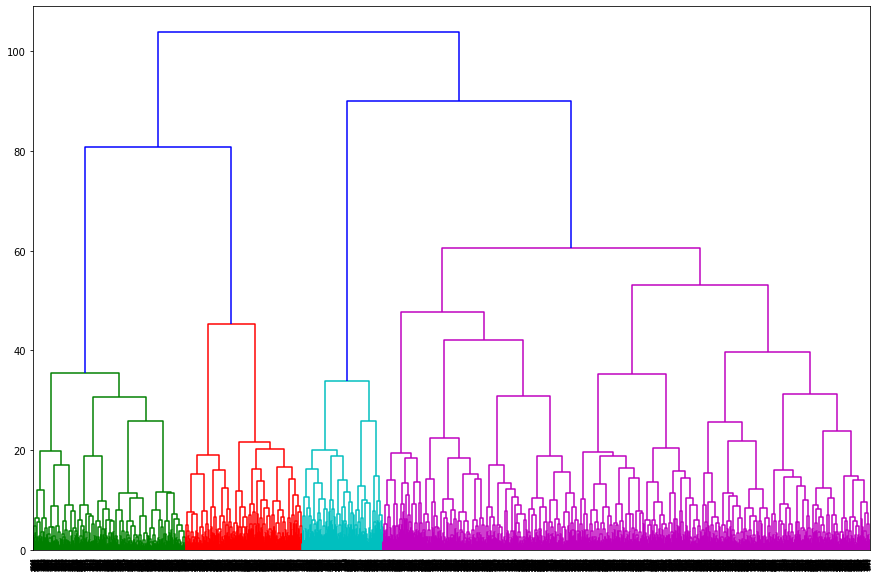

Wall time: 3min 15s


In [32]:
%%time
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show() 

Предложенное оптимальное число кластеров 4 — четыре разных цвета на графике.

**Алгоритм K-Means**

In [33]:
km = KMeans(n_clusters = 5) # задаём число кластеров, равное 5 согласно поставленному условию
labels = km.fit_predict(x_sc) # применяем алгоритм к данным и формируем вектор кластеров 

In [34]:
# сохраняем метки кластера в поле нашего датасета
logs_drop['cluster_km'] = labels
display(logs_drop.head())

,gender,near_location,partner,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total,churn,cluster_km
0,1,1,1,0,6,1,29,14.227470,3,0.020398,0,0
1,0,1,0,1,12,1,31,113.202938,7,1.922936,0,2
2,0,1,1,1,1,0,28,129.448479,2,1.859098,0,3
3,0,1,1,1,12,1,33,62.669863,2,3.205633,0,2
4,1,1,1,1,1,0,26,198.362265,3,1.113884,0,3


In [35]:
# выводим статистику по средним значениям наших признаков по кластеру
logs_drop.groupby(['cluster_km']).mean()

,gender,near_location,partner,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total,churn
cluster_km,,,,,,,,,,,
0,0.523316,0.862694,0.471503,0.0,4.777202,0.427461,29.297927,144.208179,3.940415,1.854211,0.266839
1,0.514364,1.000000,0.336525,1.0,1.715458,0.292750,26.919289,115.097378,0.978112,1.475207,0.994528
2,0.505329,0.992895,0.802842,1.0,10.284192,0.526643,29.902309,161.689780,4.652753,2.034732,0.004440
3,0.512093,1.000000,0.286906,1.0,1.996664,0.459550,30.078399,158.360527,4.768974,2.038252,0.000834
4,0.501792,0.000000,0.485663,1.0,2.962366,0.225806,28.702509,136.267753,3.057348,1.768825,0.403226


In [36]:
# определим функцию отрисовки графиков попарных признаков для кластеров
def show_clusters_on_plot(df, x_name, y_name, cluster_name):
    plt.figure(figsize = (5,5))
    sns.scatterplot(df[x_name], df[y_name], hue = df[cluster_name], palette = 'Paired')
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

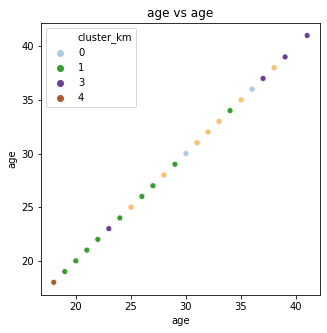

In [37]:
# отрисуем графики для пары признаков 
show_clusters_on_plot(logs_drop, 'age', 'age', 'cluster_km') 

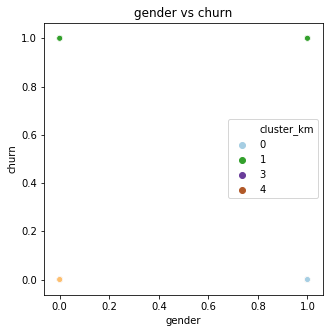

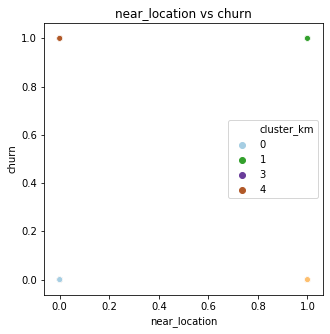

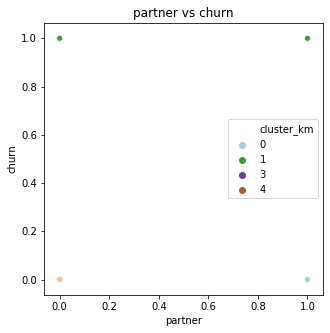

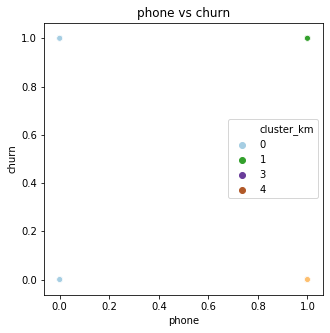

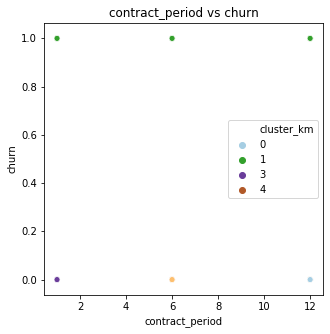

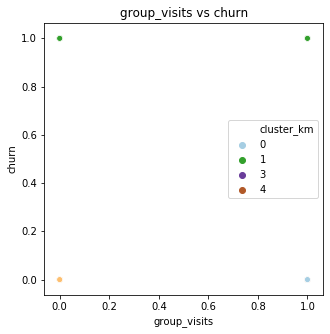

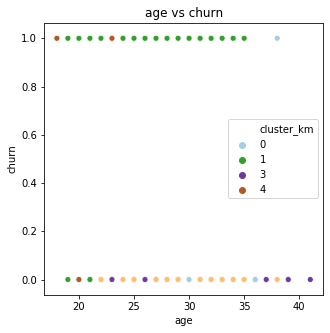

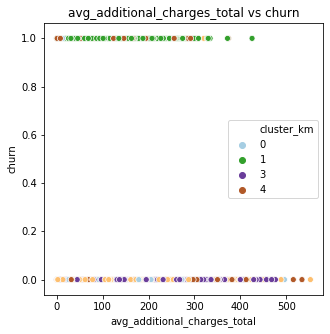

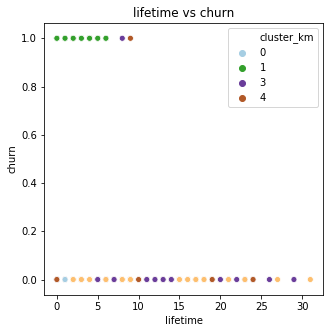

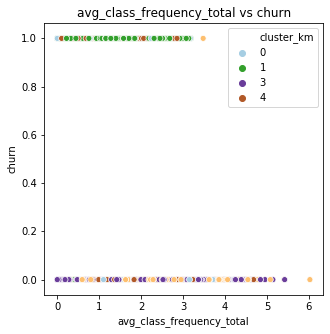

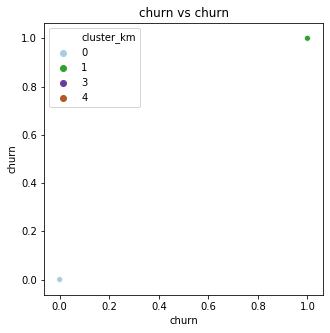

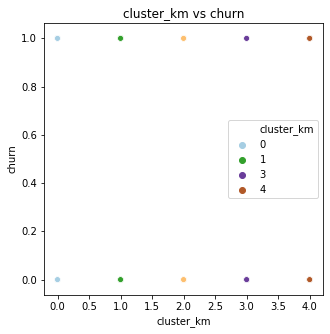

In [38]:
#построим попарные диаграммы рассеяния признак-целевая переменная churn для каждого признака
for col in logs_drop.columns:
    show_clusters_on_plot(logs_drop, col, 'churn', 'cluster_km')  

# Выводы: кластеризацию клиентов / Conclusion: Client clusterization
<a id='Выводы: Кластеризацию клиентов'></a>

С помощью дендрограммы получено 4 кластера.

С помощью алгоритма K-means было выделено 5 кластеров пользователей согласно заданию. 
Самые безопасные кластеры 1 и 2. Характерные паттерны:
 - возраст около 30 лет, лайфтайм приближается к 5 месяцам, живет близко, длительность контракта разная (1-3 месяца и 6-12 месяцев). Приобретает доп. услуги, ходит стабильно 2 тренировки в неделю.
 
Самые «опасные» кластеры в порядке убывания 3,0,4. Характерные паттерны:
 - 3- возраст около 27 лет, лайфтайм около 1 месяца, живет близко, вероятнее всего без компании партнёра, длительность контракта 1,2 или 3 месяца. Пришел попробовать. Приобретает минимум доп. услуг, ходит на тренировки 1 и 2 тренировки с чередованием через неделю.
 - 0- возраст около 29 лет, лайфтайм 3 месяца, живет далеко, длительность контракта 3 месяца. Приобретает несколько доп. услуг, старается приблизится к показателю 2 тренировки в неделю.
 - 4- возраст около 29 лет, лайфтайм 4 месяца, живет в большинстве случаев близко, длительность контракта от 3 до 6 месяцев. Приобретает несколько доп. услуг, старается приблизится к показателю 2 тренировки в неделю.


# 8. Выводы по проекту / Conclusions of the project
<a id='Выводы по проекту'></a>

**Общие выводы**

DF `logs` не имеет дубликатов, все значения уникальны, пропуски в данных отсетствуют.

Столбцы привидены к нижнему регистру.

Тип данных у столбцов корректный.

Аномалий в данных не обнаружено.
Уходит много, около 25% пользователей. Кто уходит:

 - Примерно одинаково 1 и 0, с тз половой принадлежности
 - Чаще всего те, кто дальше располагается от фитнес клуба
 - **Чаще всего те, те у кого нет партнёра (в качестве работодателя)**
 - **Чаще всего те, у кого нет друзей в фитнес клубе**
 - **Чаще всего те, у кого контракт меньше года (в среднем на 1-3 месяца)**
 - Чаще всего те, кто мало посещает групповые занятия 
 - **Чаще всего молодая возвратная группа до 27 лет**
 - Эти пользователи меньше пользуются дополнительными платными услугами
 - Как правило у них до конца контракта остается 1,5 месяца. Т.е. они посещают клуб примерно 1 месяц, потом бросают
 - Ходят на тренировке 1 или 2 раза в неделю

Прослеживается сильная зависимость оттока от:
 - Длительности контракта и остаточный период контракта 
 - Средняя частота посещений за все время и за последнюю неделю.
 - Наличия друга или партнёра, скорей всего друзья с работы.

`Accuracy` (доля правильных ответов) одинакова для модели Логистической регресии и модели Случайного леса.
Наблюдается разница в метриках `Precision` и `Recall`. Что важнее?
Метрика `precision` нужна, если каждое срабатывание модели — факт отнесения к классу "1" — стоит ресурсов. 
Метрика `recall` показывает, сколько реальных объектов "1" класса мы смогли обнаружить с помощью модели. 

Если метрика `precision` будет срабатывать чаще - для нас ничего не будет стоить, а если метрика `recall` будет чаще срабатывать - это значит мы сможем лишний раз позвонить клиенту и уточнить все ли нормально. Для нас `recall` имеет больший вес, поэтому в качестве базовой модели предсказания оттока клиентов примем модели Логистической регресии. Рекомендуется ее применение в продакшен.

С помощью дендрограммы получено 4 кластера.

С помощью алгоритма K-means было выделено 5 кластеров пользователей согласно заданию. 
Самые безопасные кластеры 1 и 2. Характерные паттерны:
 - возраст около 30 лет, лайфтайм приближается к 5 месяцам, живет близко, длительность контракта разная (1-3 месяца и 6-12 месяцев). Приобретает доп. услуги, ходит стабильно 2 тренировки в неделю.
 
Самые «опасные» кластеры в порядке убывания 3,0,4. Характерные паттерны:
 - 3- возраст около 27 лет, лайфтайм около 1 месяца, живет близко, вероятнее всего без компании партнёра, длительность контракта 1,2 или 3 месяца. Пришел попробовать. Приобретает минимум доп. услуг, ходит на тренировки 1 и 2 тренировки с чередованием через неделю.
 - 0- возраст около 29 лет, лайфтайм 3 месяца, живет далеко, длительность контракта 3 месяца. Приобретает несколько доп. услуг, старается приблизится к показателю 2 тренировки в неделю.
 - 4- возраст около 29 лет, лайфтайм 4 месяца, живет в большинстве случаев близко, длительность контракта от 3 до 6 месяцев. Приобретает несколько доп. услуг, старается приблизится к показателю 2 тренировки в неделю.



**Рекомендации**

Сильно влияют на отток:
    1. возраст - уходят молодые. Рекомендуется развивать трендовые модные направления для молодежи.
    2. количество тренировок в неделю - клиент с нестабильным графиком вероятнее всего покинет фитнес-клуб. Требуется поиск клиентов через парнеров-работодателей, развитие программы приведи друга и получи скидку, повышать персональные тренировки, чтобы повысить стабильность.
    3. длительность контракта - если контракт меньше 1-3 месяца, то клиент скорей всего "залетный", пришел попробовать. Более длительные контракты будут "держать" клиентов. Для этого требуется хорошая маркетинговая программа с гибкой системой скидок.
    4. близость расположения - необходимо больше внимания уделять клиентам, которые живут рядом. Дальние клиенты скорей всего "отвалятся", никто не хочет терять время на дорогу и пробки. 
